# Sequential model

In [131]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [132]:
train_labels = []
train_samples = []

### Example data:
- An experimental drug was teste on individuals from ages 13 to 100 in a clinical trial
- The trial had 2100 participants. Half were under 65 years old and half were 65 years or older
- Around 95% of patients 65 or older experienced side effects
- Around 95% of patients under 65 experienced no side effects

In [133]:
for i in range(50):
    # The 5% of younger individuals who experienced side effects
    train_samples.append(randint(13, 64))
    train_labels.append(1)
    # The 5% of older individuals who did not experienced side effects
    train_samples.append(randint(65, 100))
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experienced side effects
    train_samples.append(randint(13, 64))
    train_labels.append(0)
    # The 95% of older individuals who experienced side effects
    train_samples.append(randint(65, 100))
    train_labels.append(1)

In [134]:
for i in train_samples:
    print(i)

for i in train_labels:
    print(i)

35
66
61
73
39
94
22
70
34
95
14
68
18
65
57
88
41
93
17
76
41
97
34
79
46
89
28
87
52
84
61
66
27
79
25
66
46
72
45
98
16
83
46
95
35
88
33
93
63
96
26
66
25
91
50
96
29
84
51
90
41
79
19
65
27
95
60
74
46
66
33
73
20
90
56
69
64
73
56
71
46
74
43
76
35
74
43
89
59
89
29
74
61
99
18
70
28
79
59
99
27
97
49
67
22
91
46
65
29
96
39
86
60
79
25
67
20
70
31
73
14
87
47
71
21
89
25
84
18
71
30
92
15
97
35
92
30
86
14
82
17
94
25
71
42
72
44
84
23
65
53
95
54
93
58
70
15
95
49
88
53
68
46
97
19
82
51
79
21
87
51
73
39
75
39
65
17
77
20
92
47
86
31
70
40
88
56
74
51
99
15
76
47
87
34
73
39
85
54
95
15
94
13
78
38
84
18
93
35
83
54
73
53
98
51
72
38
99
51
72
53
69
21
76
14
87
61
94
22
80
54
85
43
95
62
70
50
74
26
68
35
73
54
69
54
93
19
65
13
96
28
80
13
85
31
73
51
96
24
71
61
92
52
90
23
91
31
84
50
71
44
81
50
99
57
71
31
87
28
69
23
83
49
79
30
70
64
76
64
72
59
98
41
97
34
81
53
94
62
68
51
72
45
80
24
86
40
87
39
97
34
98
26
77
21
75
43
97
50
80
56
90
43
89
14
89
50
96
32
80
49
97
32
7

In [135]:
# Convert to numpy arrays
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [136]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [137]:
for i in scaled_train_samples:
    print(i)

[0.87356322]
[0.11494253]
[0.57471264]
[0.75862069]
[0.83908046]
[0.66666667]
[0.22988506]
[0.70114943]
[0.79310345]
[0.51724138]
[0.56321839]
[0.09195402]
[0.55172414]
[0.70114943]
[0.36781609]
[0.18390805]
[0.40229885]
[0.64367816]
[0.32183908]
[0.77011494]
[0.70114943]
[0.93103448]
[0.89655172]
[0.89655172]
[0.51724138]
[0.26436782]
[0.03448276]
[0.73563218]
[0.42528736]
[0.47126437]
[0.43678161]
[0.85057471]
[0.82758621]
[0.95402299]
[0.40229885]
[0.40229885]
[0.85057471]
[0.32183908]
[0.33333333]
[0.73563218]
[0.47126437]
[0.24137931]
[0.44827586]
[0.94252874]
[0.28735632]
[0.25287356]
[0.01149425]
[0.42528736]
[0.10344828]
[0.56321839]
[0.65517241]
[0.29885057]
[0.34482759]
[0.66666667]
[0.89655172]
[0.28735632]
[0.1954023]
[0.06896552]
[0.48275862]
[0.79310345]
[0.25287356]
[0.82758621]
[0.25287356]
[0.49425287]
[0.57471264]
[0.74712644]
[0.45977011]
[0.94252874]
[0.54022989]
[0.96551724]
[0.16091954]
[0.29885057]
[0.12643678]
[0.98850575]
[0.32183908]
[0.63218391]
[0.79310345]


### Model

In [138]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [139]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

model.summary()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [140]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [141]:
# model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2) 
# verbose=2 means one line per epoch
# shuffle is true by default

Build a validation set during training

In [142]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - 5ms/step - accuracy: 0.5243 - loss: 0.6853 - val_accuracy: 0.6238 - val_loss: 0.6688
Epoch 2/30
189/189 - 0s - 2ms/step - accuracy: 0.6360 - loss: 0.6578 - val_accuracy: 0.7429 - val_loss: 0.6382
Epoch 3/30
189/189 - 0s - 2ms/step - accuracy: 0.6952 - loss: 0.6311 - val_accuracy: 0.7476 - val_loss: 0.6105
Epoch 4/30
189/189 - 0s - 2ms/step - accuracy: 0.7127 - loss: 0.6060 - val_accuracy: 0.7524 - val_loss: 0.5833
Epoch 5/30
189/189 - 0s - 2ms/step - accuracy: 0.7423 - loss: 0.5789 - val_accuracy: 0.7857 - val_loss: 0.5539
Epoch 6/30
189/189 - 0s - 2ms/step - accuracy: 0.7810 - loss: 0.5495 - val_accuracy: 0.7952 - val_loss: 0.5230
Epoch 7/30
189/189 - 0s - 2ms/step - accuracy: 0.8111 - loss: 0.5180 - val_accuracy: 0.8190 - val_loss: 0.4911
Epoch 8/30
189/189 - 0s - 1ms/step - accuracy: 0.8429 - loss: 0.4858 - val_accuracy: 0.8571 - val_loss: 0.4586
Epoch 9/30
189/189 - 0s - 1ms/step - accuracy: 0.8635 - loss: 0.4517 - val_accuracy: 0.8810 - val_loss: 0.4271
E

Test dataset

In [143]:
test_labels = []
test_samples = []

In [144]:
for i in range(50):
    # The 5% of younger individuals who experienced side effects
    test_samples.append(randint(13, 64))
    test_labels.append(1)
    # The 5% of older individuals who did not experienced side effects
    test_samples.append(randint(65, 100))
    test_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experienced side effects
    test_samples.append(randint(13, 64))
    test_labels.append(0)
    # The 95% of older individuals who experienced side effects
    test_samples.append(randint(65, 100))
    test_labels.append(1)

In [145]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

# Normalize the test data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

Predict

In [146]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

for i in predictions:
    print(i)

[0.66748875 0.33251125]
[0.02848478 0.9715152 ]
[0.9653925  0.03460747]
[0.03081967 0.9691804 ]
[0.03898812 0.9610118 ]
[0.04554886 0.95445114]
[0.3918289 0.6081711]
[0.10486037 0.89513963]
[0.9653925  0.03460747]
[0.24050178 0.75949824]
[0.10486037 0.89513963]
[0.80331576 0.19668427]
[0.02632198 0.973678  ]
[0.9054675 0.0945325]
[0.9641575  0.03584248]
[0.3918289 0.6081711]
[0.06261008 0.93738997]
[0.17134708 0.82865286]
[0.15210703 0.847893  ]
[0.11896271 0.8810373 ]
[0.02074993 0.97925013]
[0.93324196 0.06675798]
[0.5672571  0.43274292]
[0.9653925  0.03460747]
[0.9054675 0.0945325]
[0.04554886 0.95445114]
[0.15210703 0.847893  ]
[0.11896271 0.8810373 ]
[0.601742   0.39825797]
[0.32656756 0.67343247]
[0.93324196 0.06675798]
[0.04932541 0.9506746 ]
[0.07460337 0.9253967 ]
[0.93324196 0.06675798]
[0.01916282 0.98083717]
[0.06261008 0.93738997]
[0.02431929 0.9756807 ]
[0.96390593 0.03609407]
[0.96562296 0.03437703]
[0.05784736 0.9421527 ]
[0.07460337 0.9253967 ]
[0.96465564 0.03534434]


In [147]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

0
1
0
1
1
1
1
1
0
1
1
0
1
0
0
1
1
1
1
1
1
0
0
0
0
1
1
1
0
1
0
1
1
0
1
1
1
0
0
1
1
0
1
0
1
1
1
0
1
0
0
1
0
0
0
1
1
1
1
0
0
1
1
1
0
1
1
0
1
0
0
1
1
1
1
1
1
1
0
1
1
0
0
0
0
1
1
0
1
1
0
1
1
1
1
1
0
0
0
0
1
0
0
0
1
0
0
1
1
1
0
0
0
1
0
1
1
1
0
0
0
0
1
1
1
1
1
0
1
0
1
0
0
1
1
1
0
0
1
1
0
1
0
0
1
1
1
1
1
0
0
1
1
1
1
1
0
1
1
1
0
0
1
0
0
1
1
0
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
0
0
1
1
1
0
0
1
0
0
0
1
0
0
0
0
1
0
0
1
0
1
0
0
1
1
0
1
1
1
0
1
0
0
0
0
0
1
1
0
1
1
1
1
0
1
0
1
1
1
1
0
1
1
1
1
1
1
0
0
1
1
1
1
1
0
0
0
1
0
0
0
0
1
1
1
1
0
0
1
0
0
0
0
1
1
0
1
1
1
1
0
0
1
0
1
1
0
0
0
0
1
0
0
0
1
0
1
0
0
0
1
1
1
1
1
0
0
0
0
0
1
1
0
1
1
1
1
1
0
0
0
1
0
1
1
1
1
1
0
1
0
0
0
0
1
1
1
1
0
0
1
1
1
0
1
0
0
0
1
0
1
1
1
1
1
0
0
0
0
0
0
0
1
1
1
1
1
1
0
1
1
0
1
1
0
1
1
1
0
1
1
0
0
1
1
1
1
0
0
1
1
1
1
0
1
1
1
1
0
0
1
0
0
1
0
0
1
1
1
0
1
1
1
0
1
1
1
0
0
1
1
0
0
0
0
0
1
1
0
1
1
1
1
0
1
0
1
0
0
0
1
0
0
0
1
0
1
1
1
1
0
0
1
0
1
0
0
1
1
1
1
1
1
0
1
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
1
1
1
1
0
1
1
0
1
0
0
0
0
0


Confusion matrix

In [148]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [149]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [150]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 967   83]
 [  45 1005]]


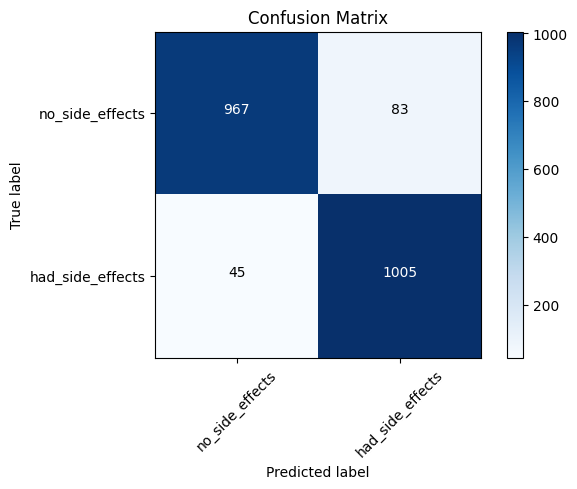

In [151]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

Save and Load a model

In [152]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,928 (7.54 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,286 (5.03 KB)

1) model.save()

In [153]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

.save() function saves:
- architecture of the model, allowing to re-create the model
- weights of the model
- training configuration (loss, optimizer)
- State of optimizer, allowing to resume training exactly where you left off

In [154]:
from tensorflow.keras.models import load_model

new_model = load_model('models/medical_trial_model.h5')

In [155]:
new_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644 (2.52 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [156]:
new_model.get_weights()

[array([[ 0.431251  , -0.02043718, -0.4151412 ,  0.00570138, -0.17660218,
         -0.19986868, -0.40883702,  0.65064585, -0.40889436, -0.53796417,
         -0.02095491, -0.03758943,  0.2915456 ,  0.5678471 , -0.552831  ,
         -0.4160854 ]], dtype=float32),
 array([-0.13067937,  0.        ,  0.        , -0.00662418,  0.        ,
         0.        ,  0.        , -0.16704695,  0.        ,  0.        ,
         0.        ,  0.        , -0.09598818, -0.01247813,  0.        ,
         0.        ], dtype=float32),
 array([[ 0.6337342 , -0.02874031, -0.07535717,  0.19427368,  0.14669582,
         -0.3096925 , -0.07753234, -0.22884104, -0.22015123,  0.378277  ,
         -0.23382464,  0.35717896, -0.12147953,  0.18053329, -0.39751878,
         -0.49985766,  0.21064857,  0.26273566,  0.4715429 , -0.16903517,
          0.10514019,  0.09077671,  0.14582159,  0.51817226, -0.01525202,
         -0.10809375, -0.34629476, -0.01092446,  0.5449985 , -0.23609874,
          0.47562453, -0.16952309],
 

In [157]:
new_model.optimizer

2) model.to_json()


- if you only need to save the architecture of the model and not its weight or its training configuration
- exact same thing can be replicated for YAML

In [158]:
json_string = model.to_json()
json_string

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_7", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 1], "dtype": "float32", "sparse": false, "name": "input_layer_7"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_21", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constr

In [159]:
from tensorflow.keras.models import model_from_json

model_architecture = model_from_json(json_string)

model_architecture.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,928 (7.54 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,286 (5.03 KB)

3) model.save_weights()

- if you only need to save the weights of a model

In [160]:
import os.path
if os.path.isfile('models/medical_trial_weights.weights.h5') is False:
    model.save_weights('models/medical_trial_weights.weights.h5')

In [161]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [163]:
model.load_weights('models/medical_trial_weights.weights.h5')

In [164]:
model2.get_weights()

[array([[ 0.22470611, -0.06105185, -0.2311266 , -0.57691264, -0.22396961,
          0.23206556, -0.3796234 , -0.0575012 , -0.47911483,  0.1259718 ,
         -0.41296953,  0.38846707,  0.16634691,  0.01902717,  0.09538662,
         -0.36350882]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[ 0.03511524, -0.11732081, -0.18478088,  0.2581298 , -0.09856868,
         -0.32453468,  0.18196979, -0.1805565 , -0.14376459, -0.30027488,
         -0.1601763 ,  0.22270218,  0.10490781, -0.06270683, -0.18084411,
          0.21985206,  0.19966081,  0.28977332, -0.00659102,  0.08035591,
          0.18302622,  0.06701493,  0.27819356,  0.26716378,  0.19878045,
         -0.23210809,  0.08563304,  0.19316068,  0.19868115,  0.22813913,
          0.00743681,  0.15492496],
        [ 0.22353038, -0.35195693,  0.15233782,  0.02524588,  0.04249826,
          0.34395733,  0.1442168 , -0.20965098, -0.12304376,  0.31557754,
         -0.23